In [1]:
# Importing Necessary Libraries
import gym
import time
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Create Detrministic environment
env = gym.make("FrozenLake-v1", is_slippery=False)
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [3]:
# Getting State size and Action size
action_size = env.action_space.n
print("Action size: ", action_size)

state_size = env.observation_space.n
print("State size: ", state_size)

Action size:  4
State size:  16


In [4]:
# Let's define a function that evaluates the given Q-Table
def eval_policy(qtable_, num_of_episodes_, max_steps_):
    rewards = []

    for episode in range(num_of_episodes_):
        state = env.reset()
        step = 0
        done = False
        total_rewards = 0

        for step in range(max_steps_):
            action = np.argmax(qtable_[state,:])
            new_state, reward, done, info = env.step(action)
            total_rewards += reward
        
            if done:
                rewards.append(total_rewards)
                break
            state = new_state
            
    env.close()
    
    avg_reward = sum(rewards)/num_of_episodes_
    
    return avg_reward

In [5]:
def Optimal_Q_learning(q_table, total_episodes, max_steps, gamma):
    #average_rewards ={}
    episodes =[]
    rewards =[]
    
    for episode in range(total_episodes):
        state = env.reset()
        step = 0
        done = False
        reward_total = 0
    
        for step in range(max_steps):
            # Choosing a random action
            action = random.randint(0, 3)
            # Take action and observe new state, reward 
            new_state, reward, done, info = env.step(action)
            # updating Q_table
            q_table[state,action]= reward+(gamma*np.amax(q_table[new_state,:]))
            #reward_total += reward
            state = new_state
            
            if done == True: 
                break
        
        if episode % 5 == 0:
            avg_reward = eval_policy(q_table,10,100)
            #average_rewards[episode+1]=avg_reward
            # print(f'Best reward after episode {episode+1} is {eval_policy(q_table,10,100)}')
            episodes.append(episode+1)
            rewards.append(avg_reward)
    return episodes, rewards, q_table

#episodes, rewards, optimal_q_table = Optimal_Q_learning(qtable_initial,1000,100, 0.9)
#print(optimal_q_table)
#print(episodes)
#print(rewards)

In [6]:
def Optimal_Q_learning_Non_Deterministic(q_table, total_episodes, max_steps, gamma,alpha):
    
    episodes =[]
    rewards =[]
    
    for episode in range(total_episodes):
        state = env.reset()
        step = 0
        done = False
        reward_total = 0
    
        for step in range(max_steps):
            # Choosing a random action
            action = random.randint(0, 3)
            # Take action and observe new state, reward 
            new_state, reward, done, info = env.step(action)
            # updating Q_table
            q_table[state,action]= q_table[state,action]+ alpha*(reward+(gamma*np.amax(q_table[new_state,:])-q_table[state,action]))
            #reward_total += reward
            state = new_state
            
            if done == True: 
                break
        
        if episode % 5 == 0:
            avg_reward = eval_policy(q_table,10,100)
            #average_rewards[episode+1]=avg_reward
            # print(f'Best reward after episode {episode+1} is {eval_policy(q_table,10,100)}')
            episodes.append(episode+1)
            rewards.append(avg_reward)
    return episodes, rewards, q_table

#episodes, rewards, optimal_q_table = Optimal_Q_learning(qtable_initial,1000,100, 0.9)
#print(optimal_q_table)
#print(episodes)
#print(rewards)

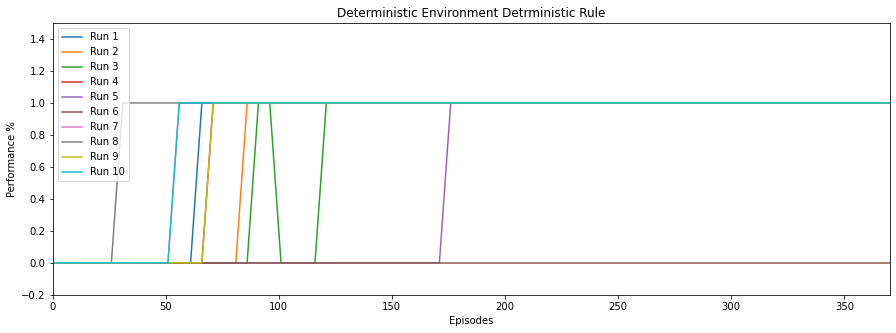

In [7]:
plot_x = []
plot_y = []

for i in range(10):
    # Initialize Q(s; a) arbitrarily for all s and a
    # Random Q-table
    qtable_initial = np.random.rand(state_size, action_size) 
    
    episodes, rewards,optimal_q_table = Optimal_Q_learning(qtable_initial,1000,100, 0.9)
    plot_x.append(episodes)
    plot_y.append(rewards)

plt.figure(figsize=(15,5))
plt.plot(plot_x[0],plot_y[0])
plt.plot(plot_x[1],plot_y[1])
plt.plot(plot_x[2],plot_y[2])
plt.plot(plot_x[3],plot_y[3])
plt.plot(plot_x[4],plot_y[4])
plt.plot(plot_x[5],plot_y[5])
plt.plot(plot_x[6],plot_y[6])
plt.plot(plot_x[7],plot_y[7])
plt.plot(plot_x[8],plot_y[8])
plt.plot(plot_x[9],plot_y[9])
plt.legend(['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5', 'Run 6', 'Run 7', 'Run 8', 'Run 9', 'Run 10'])
plt.title("Deterministic Environment Detrministic Rule")
plt.xlabel("Episodes")
plt.ylabel("Performance %")
plt.xlim(0, 370)
plt.ylim(-0.2, 1.5)
plt.show()

For Deterministic Environment with Deterministice Rule we can see that performance improves after some number of episodes 
in each run. It founds optimal Q table and using that it maximizes it's performance in evry future evaluation. 

In [8]:
# Create Non-Detrministic environment
env = gym.make("FrozenLake-v1", is_slippery=True)
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


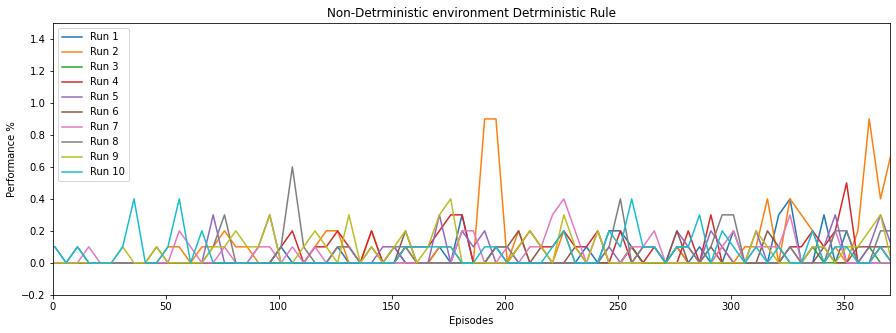

In [9]:
# Non-Detrministic environment Detrministic Rule
plot_x = []
plot_y = []

for i in range(10):
    # Initialize Q(s; a) arbitrarily for all s and a
    # Random Q-table
    qtable_initial = np.random.rand(state_size, action_size) 
    
    episodes, rewards,optimal_q_table = Optimal_Q_learning(qtable_initial,1000,100, 0.9)
    plot_x.append(episodes)
    plot_y.append(rewards)

plt.figure(figsize=(15,5))
plt.plot(plot_x[0],plot_y[0])
plt.plot(plot_x[1],plot_y[1])
plt.plot(plot_x[2],plot_y[2])
plt.plot(plot_x[3],plot_y[3])
plt.plot(plot_x[4],plot_y[4])
plt.plot(plot_x[5],plot_y[5])
plt.plot(plot_x[6],plot_y[6])
plt.plot(plot_x[7],plot_y[7])
plt.plot(plot_x[8],plot_y[8])
plt.plot(plot_x[9],plot_y[9])
plt.legend(['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5', 'Run 6', 'Run 7', 'Run 8', 'Run 9', 'Run 10'])    
plt.title("Non-Detrministic environment Detrministic Rule")
plt.xlabel("Episodes")
plt.ylabel("Performance %")
plt.xlim(0, 370)
plt.ylim(-0.2, 1.5)
plt.show()

For Non Deterministic Environment with Deterministice Rule we can see that performance flactuates over the number of episodes 
in each run. So far it does not reach to the optimal Q table. If we can increase number of episodes then we may find the optimal
Q table. 

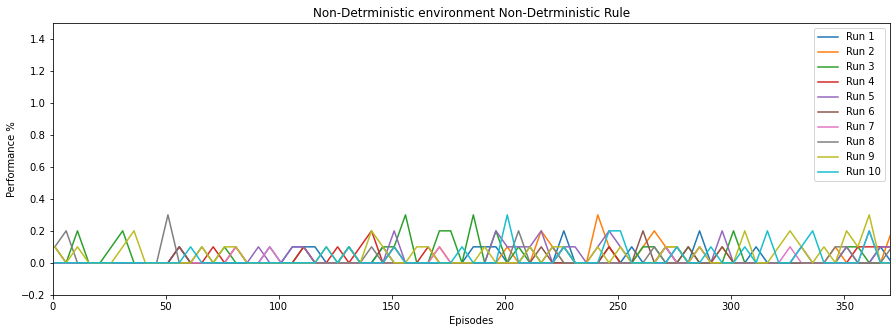

In [10]:
# Non-Detrministic environment Non-Detrministic Rule
plot_x = []
plot_y = []

for i in range(10):
    # Initialize Q(s; a) arbitrarily for all s and a
    # Random Q-table
    qtable_initial = np.random.rand(state_size, action_size) 
    
    episodes, rewards,optimal_q_table = Optimal_Q_learning_Non_Deterministic(qtable_initial,1000,100, 0.9,0.5)
    plot_x.append(episodes)
    plot_y.append(rewards)

plt.figure(figsize=(15,5))
plt.plot(plot_x[0],plot_y[0])
plt.plot(plot_x[1],plot_y[1])
plt.plot(plot_x[2],plot_y[2])
plt.plot(plot_x[3],plot_y[3])
plt.plot(plot_x[4],plot_y[4])
plt.plot(plot_x[5],plot_y[5])
plt.plot(plot_x[6],plot_y[6])
plt.plot(plot_x[7],plot_y[7])
plt.plot(plot_x[8],plot_y[8])
plt.plot(plot_x[9],plot_y[9])
plt.legend(['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5', 'Run 6', 'Run 7', 'Run 8', 'Run 9', 'Run 10']) 
plt.title("Non-Detrministic environment Non-Detrministic Rule")
plt.xlabel("Episodes")
plt.ylabel("Performance %")
plt.xlim(0, 370)
plt.ylim(-0.2, 1.5)
plt.show()

For Non Deterministic Environment with Non Deterministice Rule we can see that performance flactuates over the number of 
episodes in each run. They are showing similar pattern to Non Deterministic Environment with Deterministice Rule.So far it 
does not reach to the optimal Q table. If we can increase number of episodes then we may find the optimal Q table. 